In [1]:
from python_path import PythonPath

import dicto as do
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

with PythonPath(".."):
    from self_driving_car import estimator as est
    
    
DATA_DIR = "../data/raw"
PARAMS_PATH = "../self_driving_car/config/params.yml"

In [2]:
tf.enable_eager_execution()

In [3]:
params = do.load(PARAMS_PATH)
ds = est.input_fn(DATA_DIR, params)

BASEPATH 


/code/self_driving_car/estimator.py:21: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  filename = df.filename.as_matrix(),
/code/self_driving_car/estimator.py:22: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  steering = df.steering.as_matrix(),
/code/self_driving_car/estimator.py:23: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  camera = df.camera.as_matrix(),
/code/self_driving_car/estimator.py:24: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  original_steering = df.original_steering.as_matrix(),
/code/self_driving_car/estimator.py:28: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  tensors["flipped"] = df.flipped.as_matrix().astype(np.int32)


In [4]:
it = iter(ds)
batch = it.next()

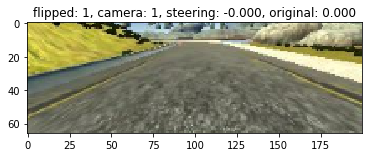

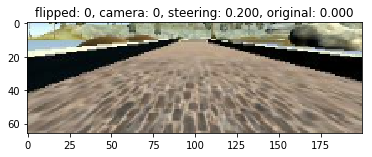

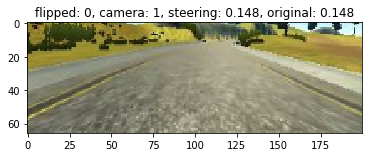

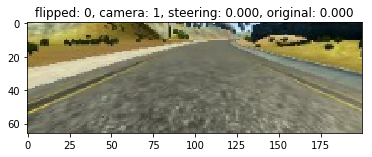

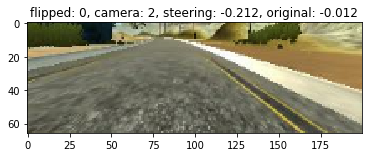

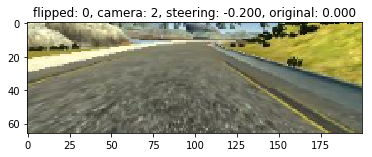

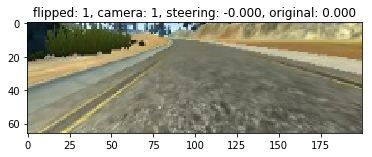

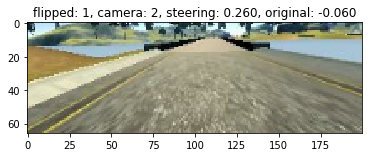

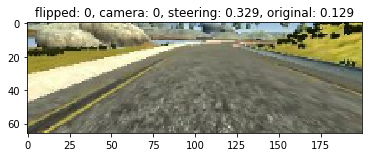

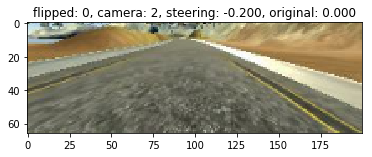

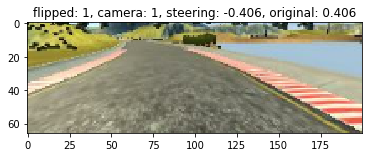

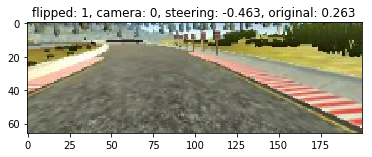

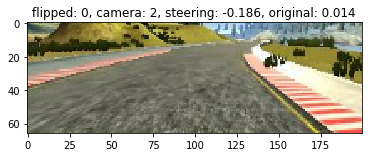

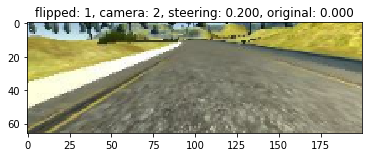

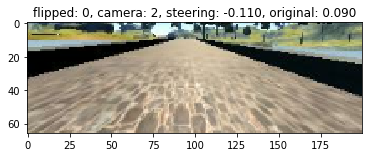

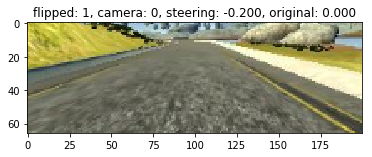

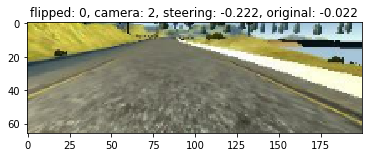

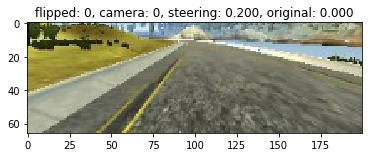

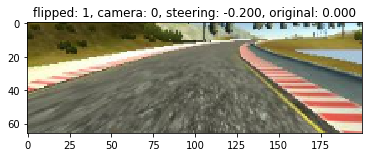

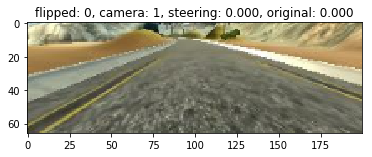

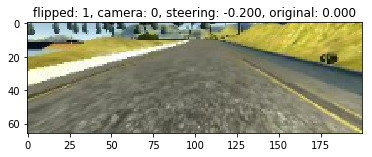

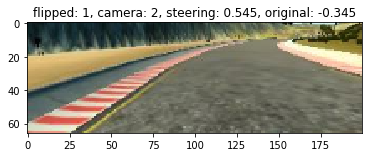

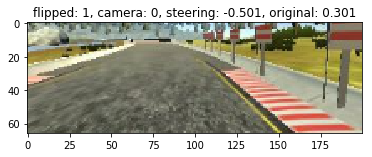

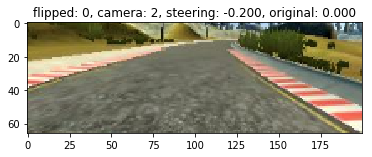

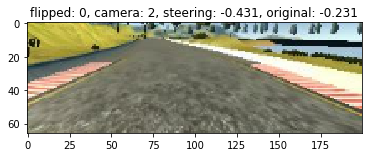

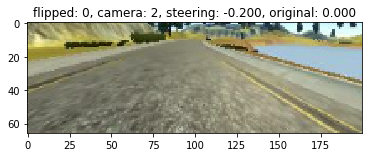

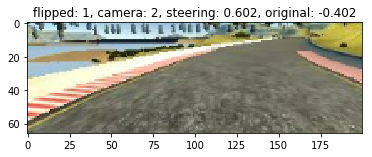

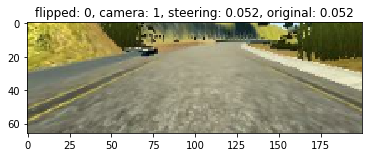

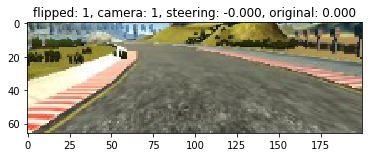

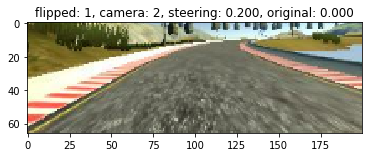

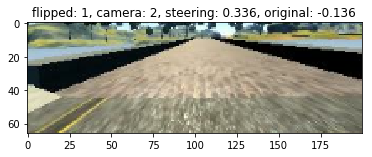

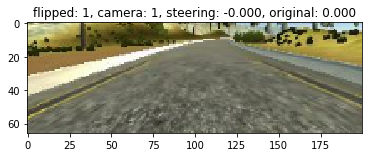

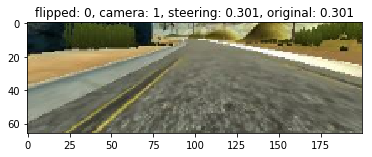

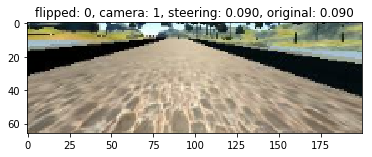

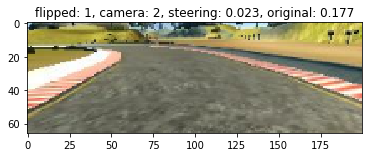

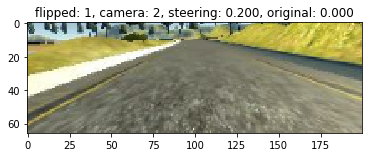

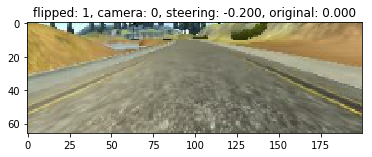

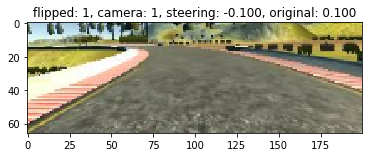

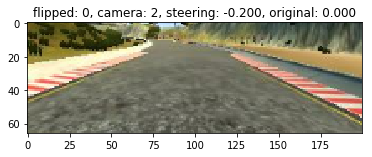

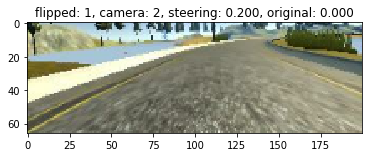

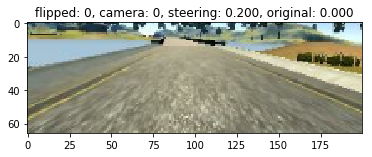

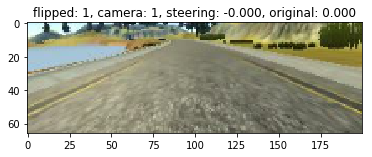

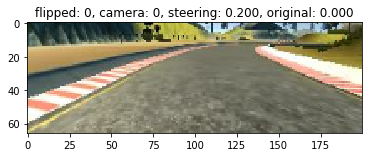

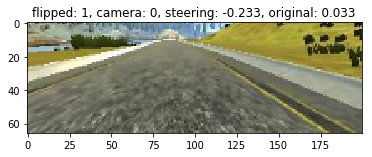

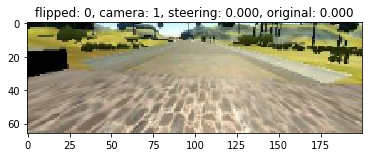

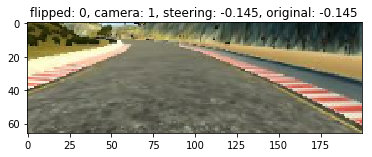

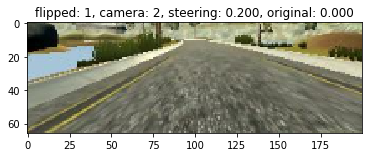

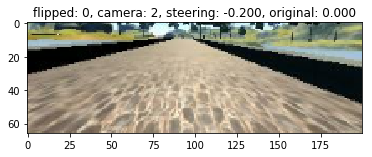

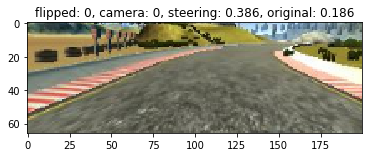

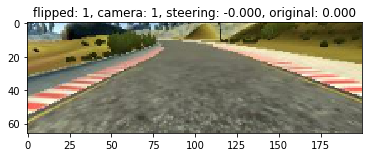

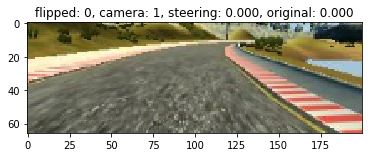

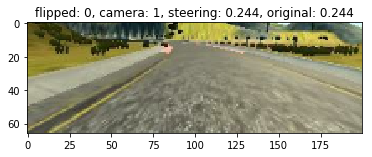

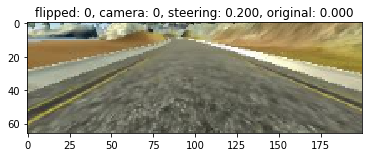

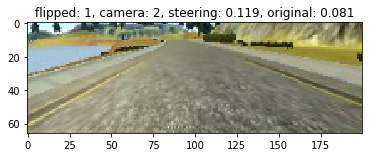

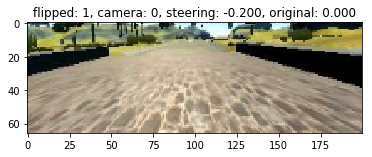

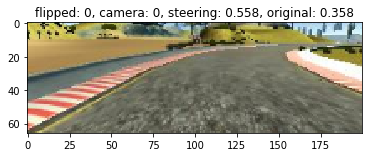

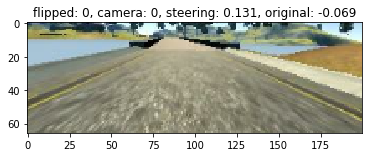

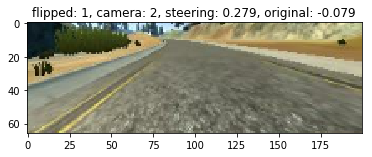

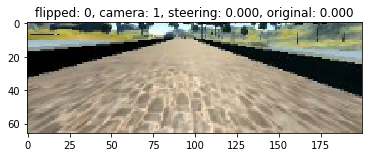

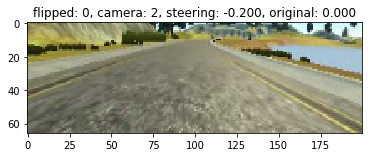

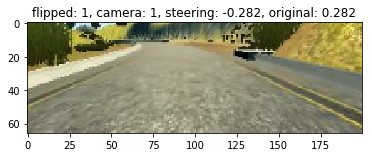

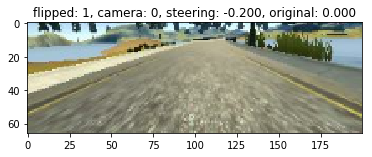

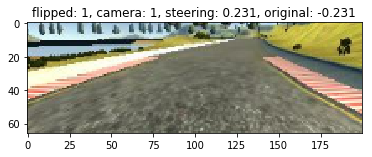

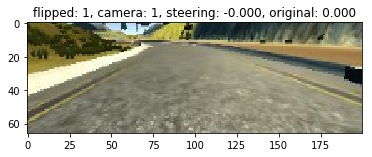

In [5]:
for camera, filename, image, steering, original_steering, flipped in zip(
    batch["camera"], batch["filename"], batch["image"], batch["steering"], 
    batch["original_steering"], batch["flipped"]):
    
    image = tf.cast(image, tf.uint8)
#     image = image.numpy().astype(np.uint8)
    
    plt.imshow(image)
    plt.title("flipped: {flipped}, camera: {camera}, steering: {steering:.3f}, original: {original_steering:.3f}".format(
        camera = camera,
        steering = steering,
        original_steering = original_steering,
        flipped = flipped,
    ))
    plt.show()
    